In [1]:
import csv
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('cobafresh.csv', sep = ',')

In [4]:
df

,Freshness,Waktu(jam),Suhu(celcius),Dummy
0,Yes,7,25,1
1,Yes,6,25,1
2,Yes,5,25,1
3,Yes,4,25,1
4,Yes,3,25,1
...,...,...,...,...
807,No,5996,-25,0
808,No,5997,-25,0
809,No,5998,-25,0
810,No,5999,-25,0


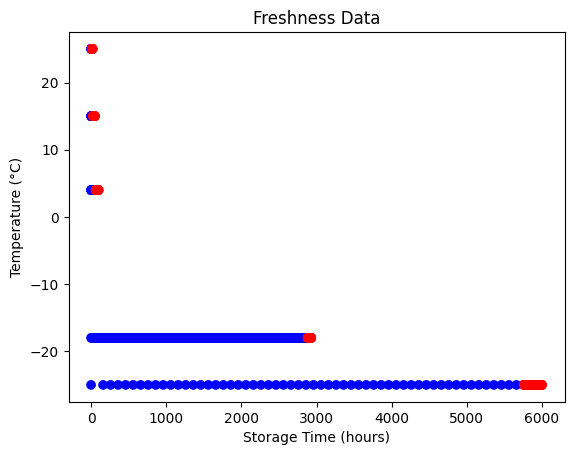

In [5]:
# Plot the data with scatter plot
colors = {'Yes': 'blue', 'No': 'red'}
plt.scatter(df['Waktu(jam)'], df['Suhu(celcius)'], c=df['Freshness'].map(colors))
plt.xlabel('Storage Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Freshness Data')
plt.show()

In [6]:
enc = OneHotEncoder()
freshness_encoded = enc.fit_transform(df['Freshness'].values.reshape(-1, 1)).toarray()

In [7]:
# Create the features (storage time and temperature) and target (freshness) arrays
X = df[['Waktu(jam)', 'Suhu(celcius)']].values
y = freshness_encoded

In [8]:
# Create and compile the model
model = Sequential()
model.add(Dense(10, input_shape=(2,), activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Train the model
model.fit(X, y, epochs=200)

Epoch 1/200
26/26 [==============================] - 1s 2ms/step - loss: 279.7416 - accuracy: 0.4643
Epoch 2/200
26/26 [==============================] - 0s 2ms/step - loss: 230.3573 - accuracy: 0.4655
Epoch 3/200
26/26 [==============================] - 0s 2ms/step - loss: 177.8574 - accuracy: 0.4680
Epoch 4/200
26/26 [==============================] - 0s 2ms/step - loss: 123.9004 - accuracy: 0.4717
Epoch 5/200
26/26 [==============================] - 0s 2ms/step - loss: 67.5125 - accuracy: 0.4889
Epoch 6/200
26/26 [==============================] - 0s 2ms/step - loss: 14.2639 - accuracy: 0.6096
Epoch 7/200
26/26 [==============================] - 0s 2ms/step - loss: 1.5484 - accuracy: 0.7968
Epoch 8/200
26/26 [==============================] - 0s 2ms/step - loss: 0.9694 - accuracy: 0.8337
Epoch 9/200
26/26 [==============================] - 0s 2ms/step - loss: 0.9948 - accuracy: 0.8190
Epoch 10/200
26/26 [==============================] - 0s 3ms/step - loss: 0.9702 - accuracy: 0.8153

In [10]:
predictions = model.predict(X)
predicted_freshness = enc.inverse_transform(predictions)

26/26 [==============================] - 0s 1ms/step


In [11]:
df['predicted'] = predicted_freshness

In [12]:
df

,Freshness,Waktu(jam),Suhu(celcius),Dummy,predicted
0,Yes,7,25,1,No
1,Yes,6,25,1,No
2,Yes,5,25,1,No
3,Yes,4,25,1,No
4,Yes,3,25,1,No
...,...,...,...,...,...
807,No,5996,-25,0,No
808,No,5997,-25,0,No
809,No,5998,-25,0,No
810,No,5999,-25,0,No


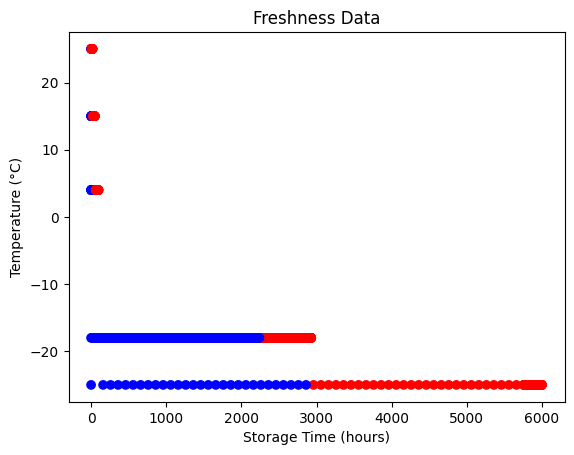

In [13]:
# Plot the data with scatter plot
colors = {'Yes': 'blue', 'No': 'red'}
plt.scatter(df['Waktu(jam)'], df['Suhu(celcius)'], c=df['predicted'].map(colors))
plt.xlabel('Storage Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Freshness Data')
plt.show()

In [14]:
# Given an array for storage time and temperature, predict the freshness condition
new_data = np.array([[2, 4]])
predictions = model.predict(new_data)
predicted_freshness = enc.inverse_transform(predictions)

1/1 [==============================] - 0s 21ms/step


In [15]:
print('Predicted Freshness:')
for i in range(len(new_data)):
    print(f'Storage Time: {new_data[i][0]} hours, Temperature: {new_data[i][1]}°C, Freshness: {predicted_freshness[i][0]}')

Predicted Freshness:
Storage Time: 2 hours, Temperature: 4°C, Freshness: Yes
